In [1]:
import numpy as np 
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [3]:
#TotalCharges column is seen as object type, but includes numeric type values therfore converting this column to numeric.

data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [4]:
#We don't need customerID column for analyzing, so drop this column.
data.drop(["customerID"],axis=1,inplace = True)

In [5]:
#There are 11 missing values in TotalCharges column. We can fill the missing values with median data,
#set it to 0 or delete these rows.Here I have used median of the data to fill missing data.

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy='median')
print("Original data: \n",data['TotalCharges'])
imputer = imputer.fit(data[['TotalCharges']])
data['TotalCharges'] = imputer.transform(data[['TotalCharges']]).ravel()
print("Final data: \n",data['TotalCharges'])

Original data: 
 0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64
Final data: 
 0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [7]:
#Replace text columns to integers. The columns below includes similar text values so I changed them once.
data.gender = [1 if each == "Male" else 0 for each in data.gender]

columns_to_convert = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'MultipleLines',
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies',
                      'PaperlessBilling', 
                      'Churn']

for item in columns_to_convert:
    data[item] = [1 if each == "Yes" else 0 if each == "No" else -1 for each in data[item]]
    
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,-1,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,-1,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


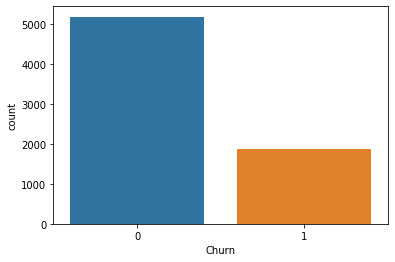

In [8]:
#The distribution of Churn values. As you can see below, the data set is imbalanced.
sns.countplot(x="Churn",data=data);

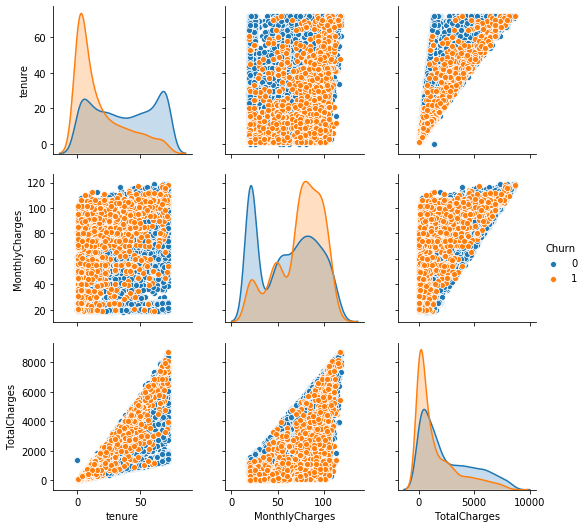

In [9]:
#People having lower tenure and higher monthly charges are tend to churn more. 
sns.pairplot(data,vars = ['tenure','MonthlyCharges','TotalCharges'], hue="Churn")

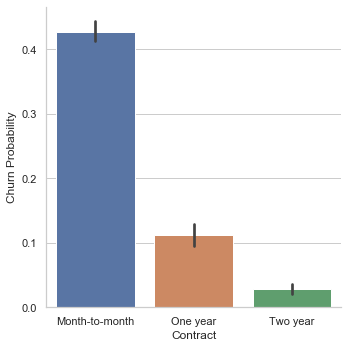

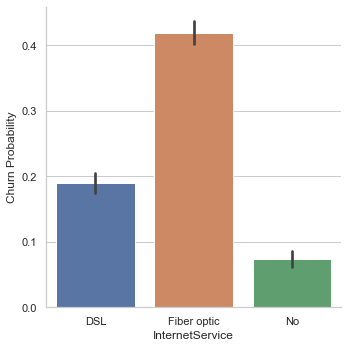

In [10]:
#Also as you can see below; having month-to-month contract and fiber obtic internet 
#have a really huge effect on churn probability.
sns.set(style="whitegrid")
g1=sns.catplot(x="Contract", y="Churn", data=data,kind="bar")
g1.set_ylabels("Churn Probability")

g2=sns.catplot(x="InternetService", y="Churn", data=data,kind="bar")
g2.set_ylabels("Churn Probability")

In [11]:
#Convert remaining text based columns to dummy columns using pandas get_dummies function.
#This function creates new columns named as values of the related columns.
#Now our data set only have integer and numerical columns so that we can apply statistical models.
data = pd.get_dummies(data=data)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,-1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,-1,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [12]:
#The correlation between churn and the remaining columns. Customers having month-to-month contract, 
#having fiber optic internet service and using electronic payment are tend to churn more whereas people
#having two-year contract and having no internet service are not tend to churn.
data.corr()['Churn'].sort_values()

tenure                                    -0.352229
Contract_Two year                         -0.302253
InternetService_No                        -0.227890
TotalCharges                              -0.199037
Contract_One year                         -0.177820
Dependents                                -0.164221
Partner                                   -0.150448
PaymentMethod_Credit card (automatic)     -0.134302
InternetService_DSL                       -0.124214
PaymentMethod_Bank transfer (automatic)   -0.117937
PaymentMethod_Mailed check                -0.091683
gender                                    -0.008612
PhoneService                               0.011942
OnlineSecurity                             0.023309
TechSupport                                0.027037
MultipleLines                              0.036310
OnlineBackup                               0.074205
DeviceProtection                           0.084654
SeniorCitizen                              0.150889
StreamingMov

In [13]:

# First, seperate x and y values. y would be our class which is Churn column in this dataset.
# x would be the remaining columns. Also, applying normalization to x in order to scale all values between 0 and 1.

# assign Class_att column as y attribute
y = data.Churn.values

# drop Class_att column, remain only numerical columns
new_data = data.drop(["Churn"],axis=1)

# Normalize values to fit between 0 and 1. 
x = (new_data-np.min(new_data))/(np.max(new_data)-np.min(new_data)).values

In [14]:
# Splitting Data

# Split the data set as train and test with %20-%80 ratio.
# Split data into Train and Test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state =1)

In [15]:
# %%KNN Classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) #set K neighbor as 3
knn.fit(x_train,y_train)
predicted_y = knn.predict(x_test)
print("KNN accuracy according to K=3 is :",knn.score(x_test,y_test))

KNN accuracy according to K=3 is : 0.7579843860894251


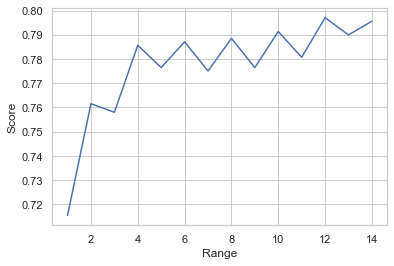

In [16]:
#We assume K = 3 for first iteration, but actually we don't know what is the optimal K value that gives maximum accuracy.
#So we can write a for loop that iterates for example 25 times and gives the accuracy at each iteration.
#So that we can find the optimal K value.
score_array = []
for each in range(1,15):
    knn_loop = KNeighborsClassifier(n_neighbors = each) #set K neighbor as 3
    knn_loop.fit(x_train,y_train)
    score_array.append(knn_loop.score(x_test,y_test))
    
plt.plot(range(1,15),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [17]:
#As we can see above, if we use K = 12, then we get maximum score 
knn_model = KNeighborsClassifier(n_neighbors = 12) #set K neighbor as 12
knn_model.fit(x_train,y_train)
predicted_y = knn_model.predict(x_test)
accuracy_knn = knn_model.score(x_test,y_test)
print("KNN accuracy according to K=12 is :",accuracy_knn)

KNN accuracy according to K=12 is : 0.7970191625266146


In [18]:
#Logistic regression classification
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
accuracy_lr = lr_model.score(x_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

C:\Users\admin\Anaconda2NDinstall\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression accuracy is : 0.8105039034776437


In [19]:
#SVM Classification
from sklearn.svm import SVC
svc_model = SVC(random_state = 1)
svc_model.fit(x_train,y_train)
accuracy_svc = svc_model.score(x_test,y_test)
print("SVM accuracy is :",accuracy_svc)

C:\Users\admin\Anaconda2NDinstall\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM accuracy is : 0.8097941802696949


In [20]:
# Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
accuracy_nb = nb_model.score(x_test,y_test)
print("Naive Bayes accuracy is :",accuracy_nb)

Naive Bayes accuracy is : 0.730305180979418


In [21]:
# Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
accuracy_dt = dt_model.score(x_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7473385379701917


[[941 120]
 [147 201]]
[[733 328]
 [ 52 296]]
[[945 116]
 [170 178]]
[[951 110]
 [158 190]]
[[849 212]
 [144 204]]


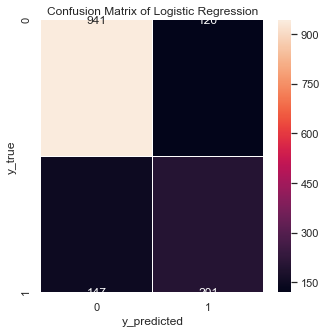

In [22]:
# Logistic regression and SVC classification algorithms have the highest accuracy.
# But as I mentioned before, our data is imbalanced. So it is important to look at the confusion matrix according 
# to these two algorithms. With imbalanced datasets, the highest accuracy does not give the best model. 

# Confusion matrix gives us FN(false negative), FP(false positive), TN(true negative) and TP(true positive) values.


# Confusion Matrix libraries
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

#for Logistic Regression
cm_lr = confusion_matrix(y_test,lr_model.predict(x_test))

print(cm_lr)

#for Gaussian Nayes Bayes
cm_nb = confusion_matrix(y_test,nb_model.predict(x_test))

print(cm_nb)

#for KNN
cm_knn = confusion_matrix(y_test,knn_model.predict(x_test))

print(cm_knn)

#for SVM
cm_svc = confusion_matrix(y_test,svc_model.predict(x_test))

print(cm_svc)

#for Decision Tree
cm_dt = confusion_matrix(y_test,dt_model.predict(x_test))

print(cm_dt)
# %% confusion matrix visualization
import seaborn as sns
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Logistic Regression")
plt.show()


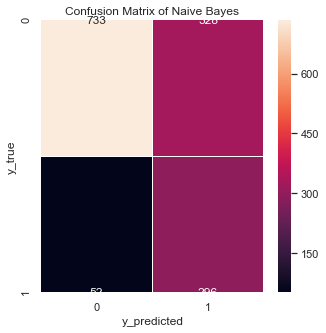

In [23]:
import seaborn as sns
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_nb, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Naive Bayes")
plt.show()

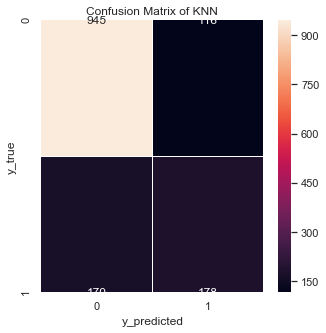

In [24]:
import seaborn as sns
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_knn, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of KNN")
plt.show()

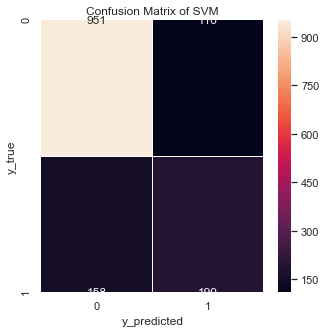

In [25]:
import seaborn as sns
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_svc, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of SVM")
plt.show()

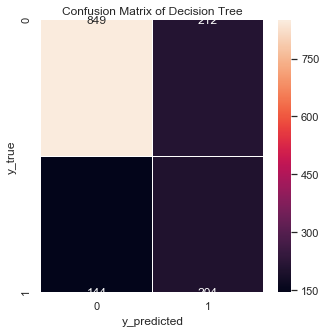

In [26]:
import seaborn as sns
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_dt, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Decision Tree")
plt.show()

In [27]:
# Above is thelogistic regression confusion matrix
# TN = 941
# FP = 120
# FN = 147
# TP = 201
# This means; there are total 941+120 = 1061 actual non-churn values and the algorithm predict 941 of them as non-churn
# and 114 of them churn. Also there are total 147 + 201 = 348 actual churn values and the algorithm predict 147 of them as
# non-churn and 197 of them as churn.
# Acuuracy should not be used as solely metric for imbalance datasets. 
# There are some other metrics named as recall and precision.There is another metric that combines both precision 
# and recall like below. We will use F1 score to identify the best algorithm score 

In [28]:
print("Logistic Regression")
report = classification_report(y_test, lr_model.predict(x_test))
print(report)

print("KNN")
report = classification_report(y_test, knn_model.predict(x_test))
print(report)

print("Naive Bayes")
report = classification_report(y_test, nb_model.predict(x_test))
print(report)

print("Decision Tree")
report = classification_report(y_test, dt_model.predict(x_test))
print(report)

print("SVM")
report = classification_report(y_test,svc_model.predict(x_test))
print(report)



Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1061
           1       0.63      0.58      0.60       348

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409

KNN
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1061
           1       0.61      0.51      0.55       348

    accuracy                           0.80      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409

Naive Bayes
              precision    recall  f1-score   support

           0       0.93      0.69      0.79      1061
           1       0.47      0.85      0.61       348

    accuracy                           0.73      1409
   macro avg       0.70      0.77      0.70      1409
weighted avg       0.82      0.73     

In [29]:
#using ensemble Adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC(probability=True,kernel='linear')

abc=AdaBoostClassifier(n_estimators=30,base_estimator=svc)
model=abc.fit(x_train,y_train)
y_pred=model.predict(x_train)

In [30]:
print("Accuracy:",accuracy_score(y_train,y_pred))

Accuracy: 0.730386936457224


In [31]:
#using ensemble 
#Bagging method
from sklearn.ensemble import VotingClassifier
estimators =[]

model1=KNeighborsClassifier(n_neighbors=3)
estimators.append(('KNN',model1))

model2=DecisionTreeClassifier()
estimators.append(('cart',model2))

model3=SVC()
estimators.append(('SVM',model3))

#create ensemble model

ensemble=VotingClassifier(estimators)
ec1f1=ensemble.fit(x_train,y_train)
y1=ec1f1.predict(x_train)
accuracy_score(y_train,y1)


C:\Users\admin\Anaconda2NDinstall\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9078807241746539

In [32]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [33]:
pca = PCA(n_components=2)
x_principal = pca.fit_transform(x)
x_principal = pd.DataFrame(x_principal)
print(x_principal)
x_principal.columns = ['P1','P2']

             0         1
0    -0.135422 -0.431480
1     0.260371  0.513862
2     0.044088 -0.461763
3    -0.020941  0.850149
4    -0.331895 -1.281905
...        ...       ...
7038 -0.482438  1.025148
7039 -0.999960  1.005388
7040 -0.060681 -0.120447
7041 -0.146085 -0.758112
7042 -1.042802  0.639724

[7043 rows x 2 columns]


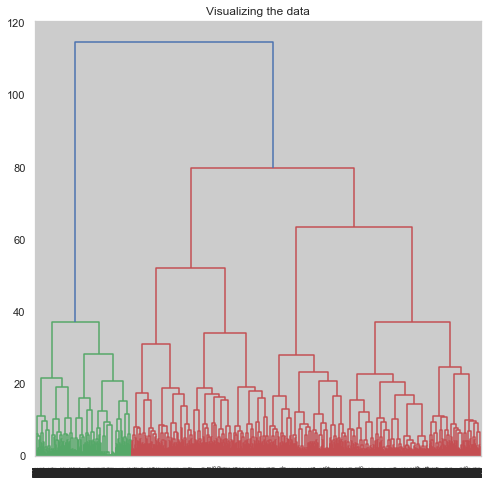

In [34]:
plt.figure(figsize=(8,8))
plt.title('Visualizing the data')
Dendogram = shc.dendrogram((shc.linkage(x, method='ward')))

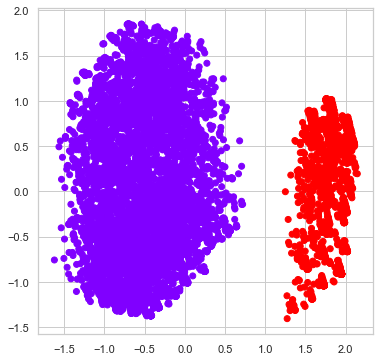

In [35]:
ac2 = AgglomerativeClustering(n_clusters=2)

plt.figure(figsize=(6,6))
plt.scatter(x_principal['P1'], x_principal['P2'], c=ac2.fit_predict(x_principal), cmap = 'rainbow')

plt.show()